# Three learning algorithms

**Author: Diana Mateus**



Scikit-learn is a very popular Machine Learning library for Python. In this notebook we will study how to put in practice three simple machine learning models 

*   Linear Regression (regression)
*   Naive Bayes (classification)
*   K-nearest neighbors (classification)

using scikit-learn:


**GOALS**: 

*   Understanding the purpose of data splitting in Machine Learning
*   Experimenting with the train, val and test functionalities of the scikit library
*   Evaluating a binary classification or a regression ML approach


## 0. Importing Modules and Data

Run the following lines to load the modules required for this lab.

In [ ]:
import numpy as np #scientific computing (in ML it handles and operates on multi-dimensional arrays)
import matplotlib.pyplot as plt #for data visualization
import sklearn #for Machine Learning


# Loading and Splitting Data

Remember that the objective of a Supervised Machine Learning methods is

*   to learn from examples
*   how to make predictions
*   for unseen data!!! 

That is, to **generalize** to unseen data (i.e. generalize to i.i.d sampled data from the same distribution as the train examples)

To train a supervised learning model we need an annotated dataset. The dataset is often denoted with a matrix $\mathbf{X}$ of dimensions $N\times D$, with $N$ the number of points/samples and $D$ the dimensionality of the feature vector describing *one* sample.

We need part of the data to train the model parameters. Moreover, if the model has hyperparameters (non trainable parameters) their tunning should be done on a different subset of the data. Finally, to verify that the model generalises well, it is important to evaluate its performance on unseen data (not used for training nor validation). For the above reasons necessary to split the data matrix into three groups:
*  **Training set** : used to fit the model parameters.
*  **Validation set** : used to set the model hyper-parameters.
*  **Test set** : used only after training and validation have been finished to evaluate the performance of the method.

For real life problems is important to reduce the use of the test set to its minimum, to improve generalization.

Next we will upload TWO datasets, one for regression and one for classification.

## Dataset for Regression

Load and explore the diabetes dataset

In [ ]:
#scikit already provides access to some common databases
from sklearn import datasets 
diabetes = datasets.load_diabetes() 


# Print the main information about the dataset
print('The full data matrix has shape',diabetes.data.shape)
print('Dimension of the feature vector', diabetes.feature_names)
print('Dimension of the target value',diabetes.target.shape)

# Explore on your own the dimensions of the dataset and their meaning. 
#print(diabetes.DESCR) #Comment/Uncomment to see the dataset description


The full data matrix has shape (442, 10)
Dimension of the feature vector ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Dimension of the target value (442,)


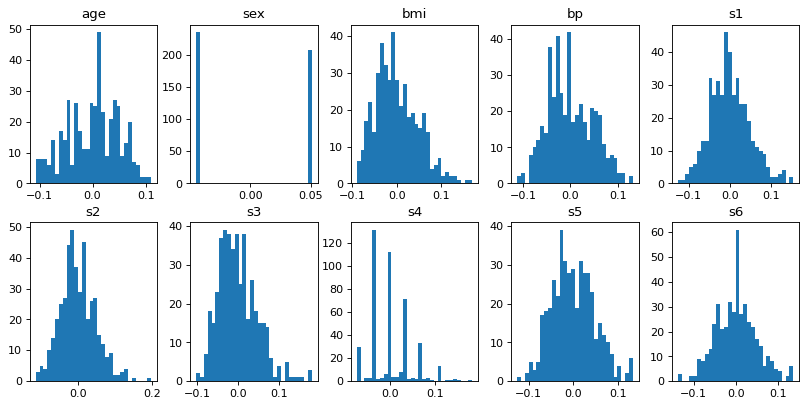

In [ ]:
#Visualize the attributes histograms
count=1
fig=plt.figure(figsize=(10, 5), dpi=80)
for i in range(diabetes.data.shape[1]):
  plt.subplot(2,5,count)
  plt.hist(diabetes.data[:,i],bins=30)
  plt.title(diabetes.feature_names[i])
  count+=1
fig.tight_layout(pad=.4)

plt.show()

In [ ]:
# Choose how many features/attributes will you consider for each data point (patient)
X = diabetes.data[:, np.newaxis, 2] #for one feature
#X = diabetes.data[:, 2:3] #if you need more features

# Look at the target values too
y = diabetes.target

# Check the shapes of the retain data and target matrices
print('Dimension of the feature matrix', X.shape)
print('Dimension of the target value',y.shape)


Dimension of the feature matrix (442, 1)
Dimension of the target value (442,)


#### Create a function for splitting the dataset into train and test

In [ ]:
# Spliting the data matrix by hand for illustration only. 
# Sklearn has an in_built train_test_split() function

def naive_split_data (X,y,split_index):
    X_train = X[:-split_index]
    X_test = X[-split_index:]
    y_train = y[:-split_index]
    y_test = y[-split_index:] 
    return X_train,X_test,y_train,y_test

def split_data(data, target, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #is better to permute the data before the split
    test_set_size = int(len(data) * test_ratio) #and to compute directly the split in terms of the proportion
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data[train_indices,:], data[test_indices,:],target[train_indices],target[test_indices]

X_train, X_test, y_train, y_test = naive_split_data(X,y,44)

#check the resultant sizes
print ('Naive Split')
print('X train', X_train.shape)
print('X test',X_test.shape)
print('y train',y_train.shape)
print('y test',y_test.shape)


X_train, X_test, y_train, y_test = split_data(X,y,0.1)

print ('Less Naive Split')
#check the resultant sizes
print('X train', X_train.shape)
print('X test',X_test.shape)
print('y train',y_train.shape)
print('y test',y_test.shape)



Naive Split
X train (398, 1)
X test (44, 1)
y train (398,)
y test (44,)
Less Naive Split
X train (398, 1)
X test (44, 1)
y train (398,)
y test (44,)


## Datasets for Classification

Load and explore the breast_cancer dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

print(label_names)
print(labels.shape)
print(feature_names)
print(features.shape)

#print(data.DESCR) #Comment/Uncomment to see or hide the full dataset description

['malignant' 'benign']
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


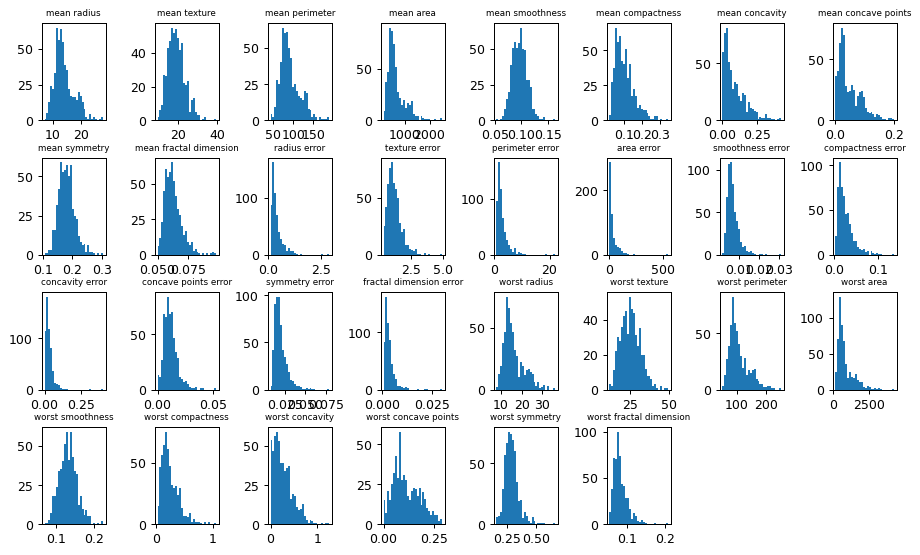

In [ ]:
#Visualize the attributes histograms

count=1
fig=plt.figure(figsize=(10, 6), dpi=90)
for i in range(features.shape[1]):
  plt.subplot(4,8,count)
  plt.hist(features[:,i],bins=30)
  plt.title(feature_names[i],fontsize=7)
  count+=1
fig.tight_layout(pad=0.1)

plt.show()

### Dataset splitting

The following scikit function splits the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(features,labels,test_size = 0.40, random_state = 42)

print ('Scikit Split')
#check the resultant sizes
print('X2 train', X2_train.shape)
print('X2 test',X2_test.shape)
print('y2 train',y2_train.shape)
print('y2 test',y2_test.shape)

Scikit Split
X2 train (341, 30)
X2 test (228, 30)
y2 train (341,)
y2 test (228,)


# 1. Training a ML model

When relying with on the scikit library, training a model is very simple. You  need to:
*   Load the model from scikit
*   Declare a new instance of the model 
*   Train the model parameters
*   Make predictions for new data
*   Evaluate the performance

Identify in the example code the above steps



### Model 1. Linear Regression

In [ ]:
#Load and declare a new instance 
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [ ]:
#Fit (train) the model 

regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Look at the internal parameters of the model 
#type regr. you will see all the available data and functions
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# TODO: Explore other variables and methods of the LinearRegression class

Coefficients: 
 [966.41841449]
Intercept: 
 151.65334604705748


In [ ]:
#Make predictions (On the test set)
y_pred = regr.predict(X_test)

In [ ]:
#Evaluate the performance
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 4050.42
Variance score: 0.31


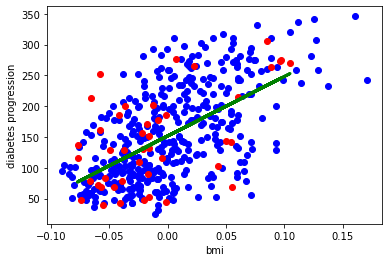

In [ ]:
#Visualize the test data fit model for 1 feature (bmi)
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='green', linewidth=3)
plt.xlabel('bmi')
plt.ylabel('diabetes progression')
plt.show()

## Model 2. Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnbClassifier = GaussianNB()
gnbClassifier.fit(X2_train,y2_train)
y2_pred_gnb = gnbClassifier.predict(X2_test)
print(y2_pred_gnb.shape)

(228,)


In [ ]:
#Compute accuracy on the training set
train_accuracy = gnbClassifier.score(X2_train, y2_train)
    
#Compute accuracy on the test set
test_accuracy = gnbClassifier.score(X2_test, y2_test) 

print('train accuracy', train_accuracy)
print('test accuracy',test_accuracy)

train accuracy 0.9384164222873901
test accuracy 0.9517543859649122


## Model 3. K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=10)
knnClassifier.fit(X2_train, y2_train)
y2_pred_knn = knnClassifier.predict(X2_test)
print(y2_pred_knn.shape)

(228,)


In [ ]:
#Compute accuracy on the training set
train_accuracy = knnClassifier.score(X2_train, y2_train)
    
#Compute accuracy on the test set
test_accuracy = knnClassifier.score(X2_test, y2_test) 

print('train accuracy', train_accuracy)
print('test accuracy',test_accuracy)

train accuracy 0.9237536656891495
test accuracy 0.9824561403508771


# QUESTIONS



1.   For each model:

*   What happens inside the fit function?
*   What happens in the predict function?
*   How is the chosen performance score computed?
*   What criteria is being optimized?


2.   For the **linear regression** example and keeping the size of the test set fixed, 

*   What is the effect on the (test) performance when we progressively increase the amount of training data? Try with a single feature at a time. Plot the score vs the number of training points and discuss. 


*   What is the effect of using other variables other than the  'bmi' during training?, try training and testing on other single features. Is it using more information always better? Progressively add new features to the data matrix. Plot the score vs the number of features

3. Are the **Naive Bayes and the KNN Classifiers**  affected by scaling in the features? Use the ``standardScaler``
from scikit learn ``from sklearn import preprocessing `` before the fit function and compare the results

4. **Train/Test or Train/Val/Test** In the above examples, we have split each dataset into two subsets each. Are two subsets (train and test) enough for the three models (lin reg,  NaiveBayes,KNN,)? Answer for each model. Which models would benefit from having a validation set?

5.   Repeat the KNN example, but splitting the dataset into three subsets(train,val,test). Progressively modify the hyperparameter k.  What is the best neighborhood size k?, what is the appropriate methodologogy to find this number? 
6.   How do we know if learning was really succesful (vs underfitting or overfitting?)

8.   Naive Bayesian classifiers are probabilistic classifiers. How do we recover the probabilistic information associated to this model? What quantities can we recover?

9.   For the **classification methods**:
- Which are Discriminative? Generative?
- Can the method deal with non-linearly separable data?
- Is the method suitable for multiclass classification problems?



**BONUS**
Implement your own version of the three algorithms and compare the results to the built-in functions 

